In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

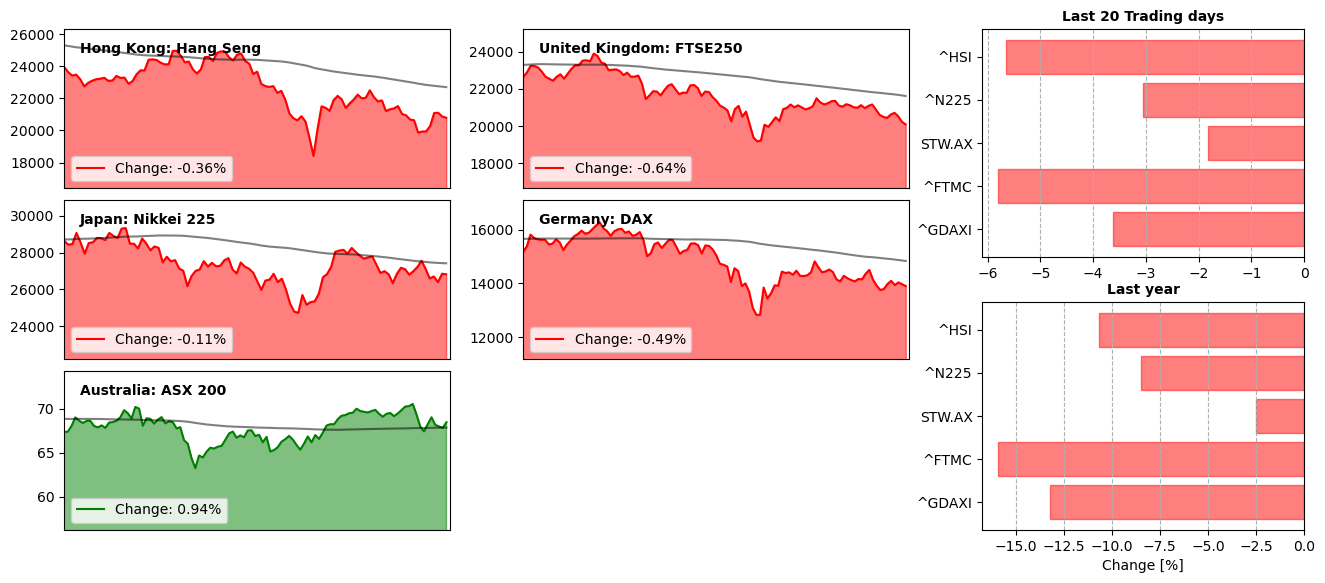

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 06-05-2022 at 09:36:40


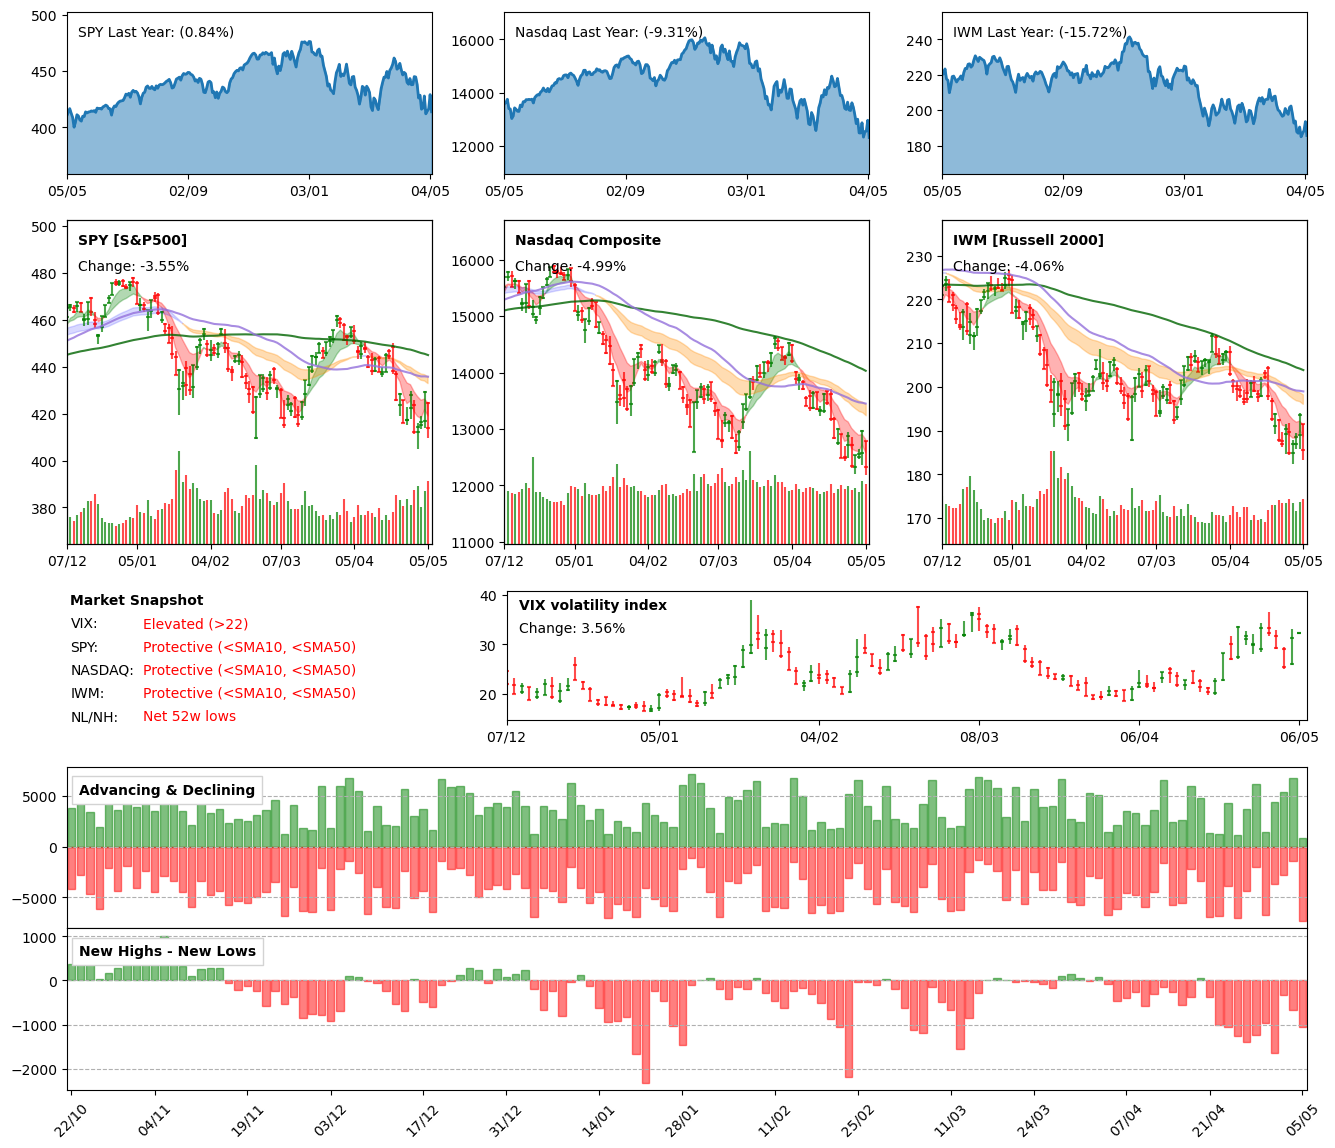

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

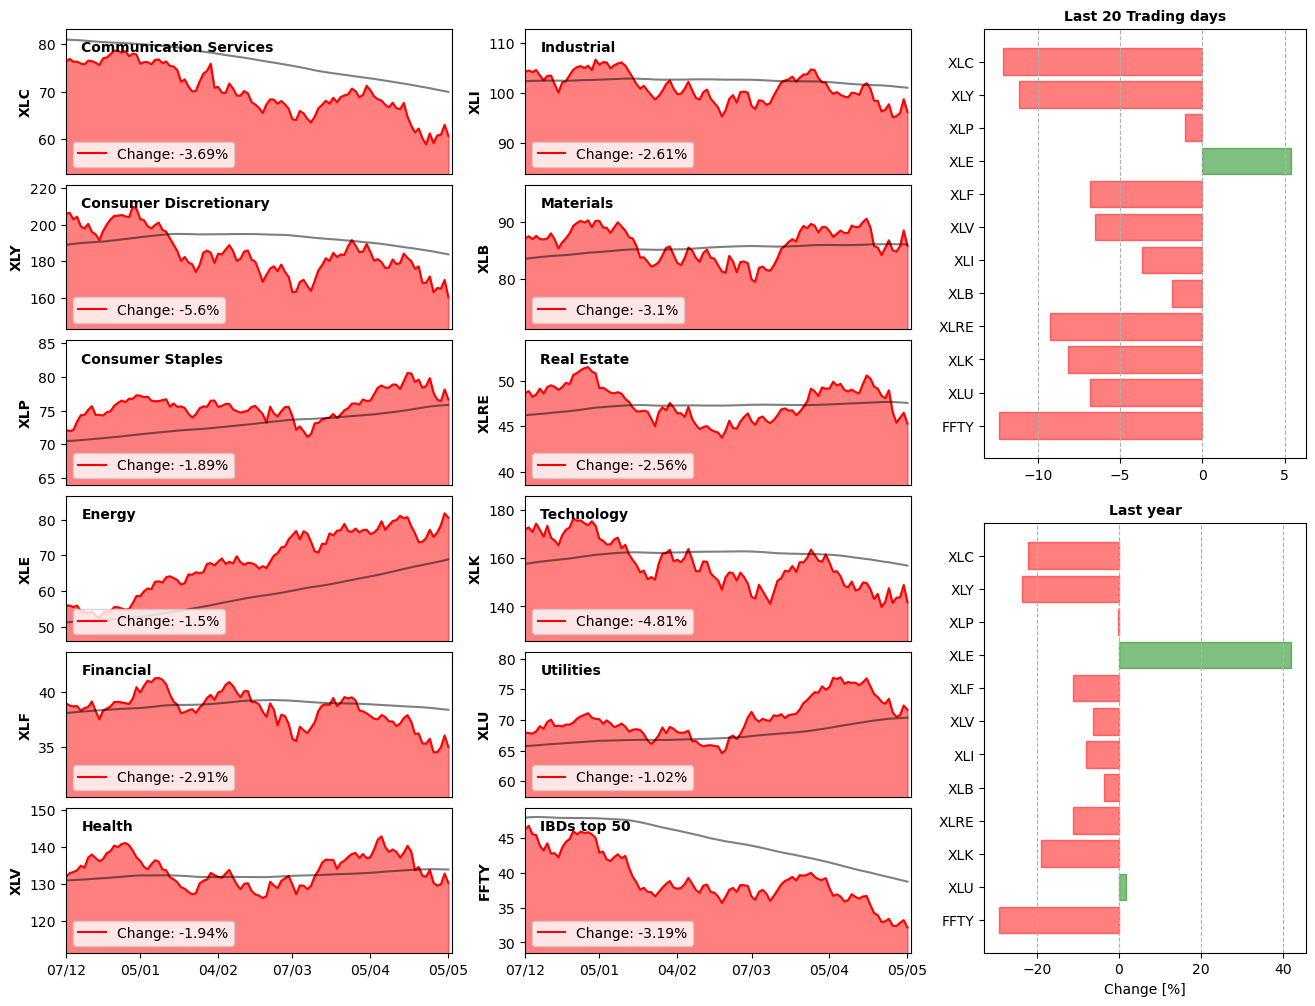

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Thermal Coal,0.15,14.12,78.37,245.10,0.70,-0.72,0
Coking Coal,0.86,13.75,67.48,206.28,1.04,-0.82,0
Lumber & Wood Production,0.89,11.32,9.55,11.95,1.73,-4.18,0
Oil & Gas Refining & Marketing,5.45,9.68,31.83,27.44,1.00,-2.22,0
Electronics & Computer Distribution,3.80,8.47,4.71,5.00,1.44,-0.53,3
Utilities - Independent Power Producers,-1.84,6.38,3.09,29.35,1.04,-4.52,-1
Auto & Truck Dealerships,3.30,5.83,-19.74,-19.13,0.78,-4.64,-1
Oil & Gas E&P,5.21,5.32,43.22,86.66,0.90,-1.50,3
Oil & Gas Drilling,3.03,3.75,48.58,80.00,0.71,-3.16,3
"Furnishings, Fixtures & Appliances",1.55,3.31,-27.83,-37.07,0.58,-4.19,-3


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Other Industrial Metals & Mining,-3.39,-15.40,19.53,-17.07,0.87,-4.38,-1
Auto Manufacturers,-1.11,-16.16,-29.28,6.95,0.92,-6.68,-1
Internet Content & Information,-1.54,-16.56,-26.10,-14.00,0.97,-5.14,-4
Copper,-3.08,-17.22,7.87,-8.26,1.22,-3.74,2
Electronic Gaming & Multimedia,-1.71,-19.26,-51.22,-46.60,0.84,-5.36,0
Software - Application,-7.68,-19.58,-45.19,-29.82,1.08,-7.10,-2
Entertainment,-2.89,-22.29,-40.36,-37.78,0.95,-3.13,0
Health Information Services,-4.09,-22.52,-42.82,-39.75,1.09,-4.74,1
Aluminum,-10.18,-26.22,-3.65,-3.70,0.81,-6.62,1
Internet Retail,-15.07,-26.43,-37.37,-40.32,1.01,-7.90,-2


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Shell Companies,-0.11,-0.20,-2.41,-1.45,1.45,-0.20,-0.290000
Thermal Coal,0.15,14.12,78.37,245.10,0.70,-0.72,-0.504000
Tobacco,-1.21,3.12,12.16,2.59,0.53,-1.18,-0.625400
REIT - Healthcare Facilities,-2.13,-5.85,-2.06,1.10,1.23,-0.54,-0.664200
Marine Shipping,4.96,3.25,18.08,29.84,0.58,-1.28,-0.742400
Electronics & Computer Distribution,3.80,8.47,4.71,5.00,1.44,-0.53,-0.763200
Utilities - Regulated Gas,0.04,-2.22,15.70,9.16,1.06,-0.77,-0.816200
Insurance - Reinsurance,-0.56,-4.59,-4.74,-9.29,1.35,-0.62,-0.837000
Coking Coal,0.86,13.75,67.48,206.28,1.04,-0.82,-0.852800
Pharmaceutical Retailers,-1.86,0.04,-13.23,-23.14,0.57,-1.64,-0.934800


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

AttributeError: 'NoneType' object has no attribute 'split'

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0